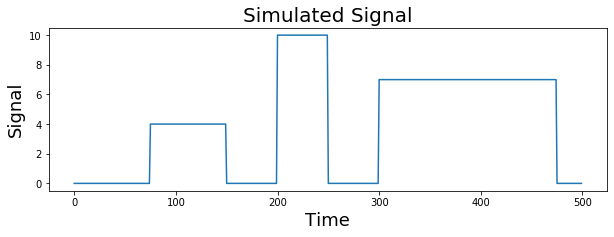

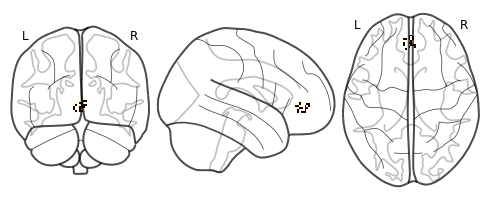

In [7]:
import numpy as np
from nltools.mask import create_sphere
from nltools.data import Brain_Data
import matplotlib.pyplot as plt
from nilearn.plotting import plot_glass_brain

n_observations = 500
p = .3
sigma = 1
n_sub = 3

y = np.zeros(n_observations)
y[np.arange(75,150)] = 4
y[np.arange(200,250)] = 10
y[np.arange(300,475)] = 7

def simulate_data(n_observations, y, p, sigma, mask):
    ''' Simulate Brain Data

        Args:
            n_observations: (int) number of data points
            y: (array) one dimensional array of signal
            p: (float) probability of signal in voxels
            sigma: (float) amount of gaussian noise to add

        Returns:
            data: (list) of Brain_Data objects
    '''

    dat = Brain_Data(mask).apply_mask(mask)
    new_data = np.zeros((dat.shape()[0], n_observations))
    for i in np.where(dat.data==1)[0]:
        if np.random.randint(0,high=10) < p:
            new_data[i,:] = y
    noise = np.random.randn(new_data.shape[0],n_observations)*sigma
    dat.data = (new_data+noise).T
    return dat

mask = create_sphere([0, 45, 0], radius=8)
data = [simulate_data(n_observations, y, p, sigma, mask) for x in range(n_sub)]

plt.figure(figsize=(10,3))
plt.plot(y)
plt.title('Simulated Signal', fontsize=20)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Signal', fontsize=18)
plot_glass_brain(data[0].mean().to_nifti())


In [2]:
from nltools.stats import align

out = align(data, method='procrustes')

print(out.keys())


dict_keys(['transformed', 'common_model', 'transformation_matrix', 'disparity', 'scale', 'isc'])


Text(0.5, 1.0, 'Average Voxel x Time Matrix of Aligned Data')

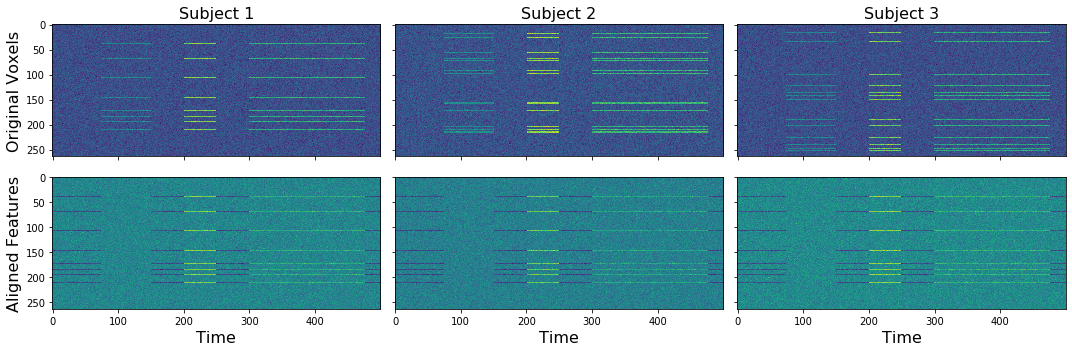

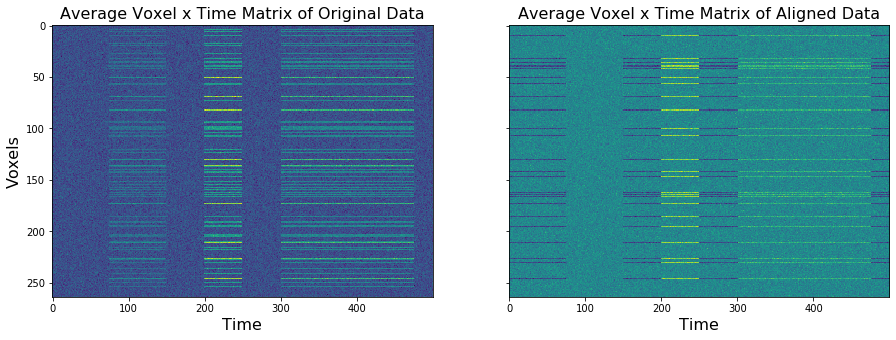

In [4]:
f,a = plt.subplots(nrows=2, ncols=3, figsize=(15,5), sharex=True, sharey=True)
[a[0,i].imshow(x.data.T, aspect='auto') for i,x in enumerate(data)]
[a[1,i].imshow(x.data.T, aspect='auto') for i,x in enumerate(out['transformed'])]
a[0,0].set_ylabel('Original Voxels', fontsize=16)
a[1,0].set_ylabel('Aligned Features', fontsize=16)
[a[1,x].set_xlabel('Time', fontsize=16) for x in range(3)]
[a[0,x].set_title('Subject %s' % str(x+1), fontsize=16) for x in range(3)]
plt.tight_layout()

f,a = plt.subplots(ncols=2, figsize=(15,5), sharex=True, sharey=True)
a[0].imshow(np.mean(np.array([x.data.T for x in data]), axis=0), aspect='auto')
a[1].imshow(np.mean(np.array([x.data.T for x in out['transformed']]), axis=0), aspect='auto')
a[0].set_ylabel('Voxels', fontsize=16)
[a[x].set_xlabel('Time', fontsize=16) for x in range(2)]
a[0].set_title('Average Voxel x Time Matrix of Original Data', fontsize=16)
a[1].set_title('Average Voxel x Time Matrix of Aligned Data', fontsize=16)

NameError: name 'dat' is not defined